In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
import warnings
warnings.filterwarnings("ignore")

In [2]:
# email classification
# subject_formality_score -> sender formality score
# sender_relationship_score -> sender relationship score
# email_type -> 0 = Personal, 1 = Work email

In [3]:
df = pd.read_csv("9-email_classification_svm.csv")

In [4]:
df.head()

,subject_formality_score,sender_relationship_score,email_type
0,-1.496790,0.779258,0
1,-1.217610,0.889601,0
2,-0.375945,-0.823324,1
3,0.639609,-0.362827,1
4,-1.342836,-1.040502,1


In [5]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [7]:
df.isnull().sum().sum()

np.int64(0)

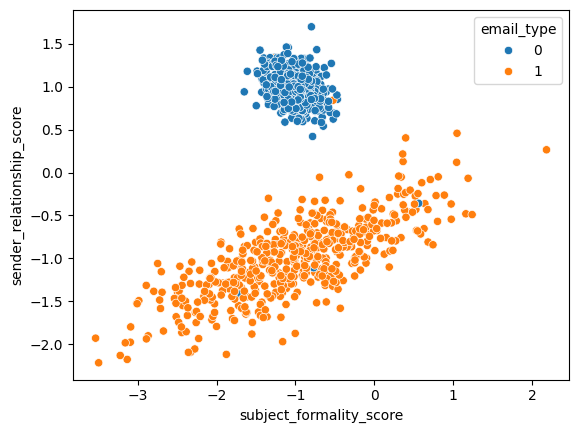

In [8]:
sns.scatterplot(
    x=df["subject_formality_score"],
    y=df["sender_relationship_score"],
    hue=df["email_type"]
)
plt.show()

In [9]:
df["email_type"].value_counts()

email_type
0    502
1    498
Name: count, dtype: int64

In [10]:
X = df.drop("email_type", axis=1)
y = df["email_type"]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=15
)

In [13]:
from sklearn.svm import SVC

In [14]:
svc = SVC(kernel="linear")

In [15]:
svc.fit(X_train, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [16]:
y_pred = svc.predict(X_test)

In [17]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [18]:
print(accuracy_score(y_pred, y_test))
print(classification_report(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.996
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       117
           1       1.00      0.99      1.00       133

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

[[117   0]
 [  1 132]]
